## Linear regression model
**For predicting Car Price** (dependent variable)
 <br> via a linear regression model with different independent variables( mixture of categorical and numerical Variables)
 
In this model, I have used a combination of functions and loops to eliminate the manual and redundant tasks and have optimised the process of chart creation(visualisation) and feature selection 

In [1]:
import numpy as np
import pandas as pd

# also in 16
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data 
data=pd.read_csv("Python/Notebooks/input_data/CarPrice_Assignment.csv")

In [3]:
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [4]:
data.shape
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

### **Data cleaning**

In [6]:
sorted(data['CarName'].unique())

['Nissan versa',
 'alfa-romero Quadrifoglio',
 'alfa-romero giulia',
 'alfa-romero stelvio',
 'audi 100 ls',
 'audi 100ls',
 'audi 4000',
 'audi 5000',
 'audi 5000s (diesel)',
 'audi fox',
 'bmw 320i',
 'bmw x1',
 'bmw x3',
 'bmw x4',
 'bmw x5',
 'bmw z4',
 'buick century',
 'buick century luxus (sw)',
 'buick century special',
 'buick electra 225 custom',
 'buick opel isuzu deluxe',
 'buick regal sport coupe (turbo)',
 'buick skyhawk',
 'buick skylark',
 'chevrolet impala',
 'chevrolet monte carlo',
 'chevrolet vega 2300',
 'dodge challenger se',
 'dodge colt (sw)',
 'dodge colt hardtop',
 'dodge coronet custom',
 'dodge coronet custom (sw)',
 'dodge d200',
 'dodge dart custom',
 'dodge monaco (sw)',
 'dodge rampage',
 'honda accord',
 'honda accord cvcc',
 'honda accord lx',
 'honda civic',
 'honda civic (auto)',
 'honda civic 1300',
 'honda civic 1500 gl',
 'honda civic cvcc',
 'honda prelude',
 'isuzu D-Max ',
 'isuzu D-Max V-Cross',
 'isuzu MU-X',
 'jaguar xf',
 'jaguar xj',
 'jag

In [7]:
company_name= data['CarName'].str.split(' ').str[0]

In [8]:
data.insert(3,"CompanyName",company_name)

In [9]:
data.drop('CarName',axis=1,inplace=True)

In [10]:
sorted(data.CompanyName.unique())

['Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porcshce',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'vokswagen',
 'volkswagen',
 'volvo',
 'vw']

### Spelling check

In [11]:
data.CompanyName=data.CompanyName.str.lower()

In [12]:
def replace(a,b):
    data.CompanyName.replace(a,b,inplace=True)

In [13]:
replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('volkswagen','vokswagen')
replace('vw','vokswagen')

In [14]:
sorted(data.CompanyName.unique())

['alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'vokswagen',
 'volvo']

In [15]:
# Looking for duplicated data
data.loc[data.duplicated()]

Empty DataFrame
Columns: [car_ID, symboling, CompanyName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]

### EDA and visualisation

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/g9/qgc41ngn72166dpgb6kt699h0000gn/T/ipykernel_49143/320874715.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price)


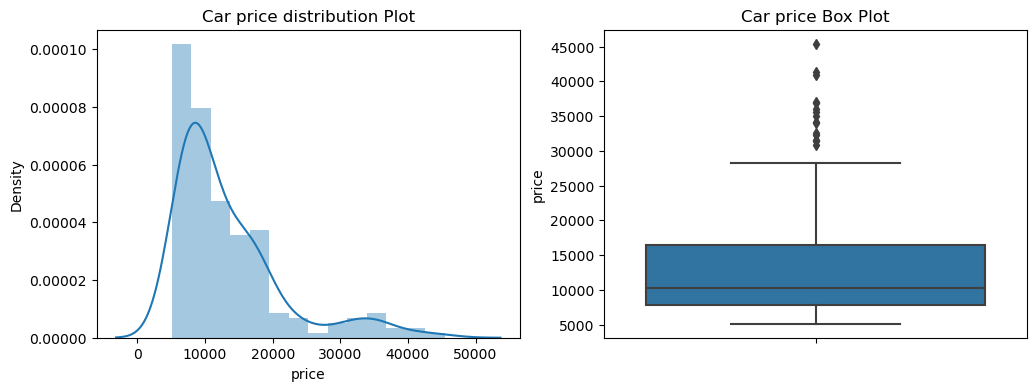

In [17]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Car price distribution Plot')
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title('Car price Box Plot')
sns.boxplot(y=data.price)

plt.show()

The data is right-skewed and most of the data is there in the lower price points, whereas there is some scatter in the higher price points as well <br> Looking at the table of values and the numbers

In [18]:
max_price = data['price'].max()
bins = np.arange(0, max_price + 5000, 5000)  # from 0 to max price, step 10k
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]

data['PriceBucket'] = pd.cut(data['price'], bins=bins, labels=labels, right=False)
bucket_counts = data['PriceBucket'].value_counts().sort_index()

print(bucket_counts)

0-5000           0
5000-10000     100
10000-15000     41
15000-20000     38
20000-25000      8
25000-30000      3
30000-35000      7
35000-40000      5
40000-45000      2
45000-50000      1
Name: PriceBucket, dtype: int64


In [19]:
data = data.drop('PriceBucket', axis=1)

In [20]:
data.price.describe(percentiles=[0.9])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
50%      10295.000000
90%      22563.000000
max      45400.000000
Name: price, dtype: float64

In [21]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


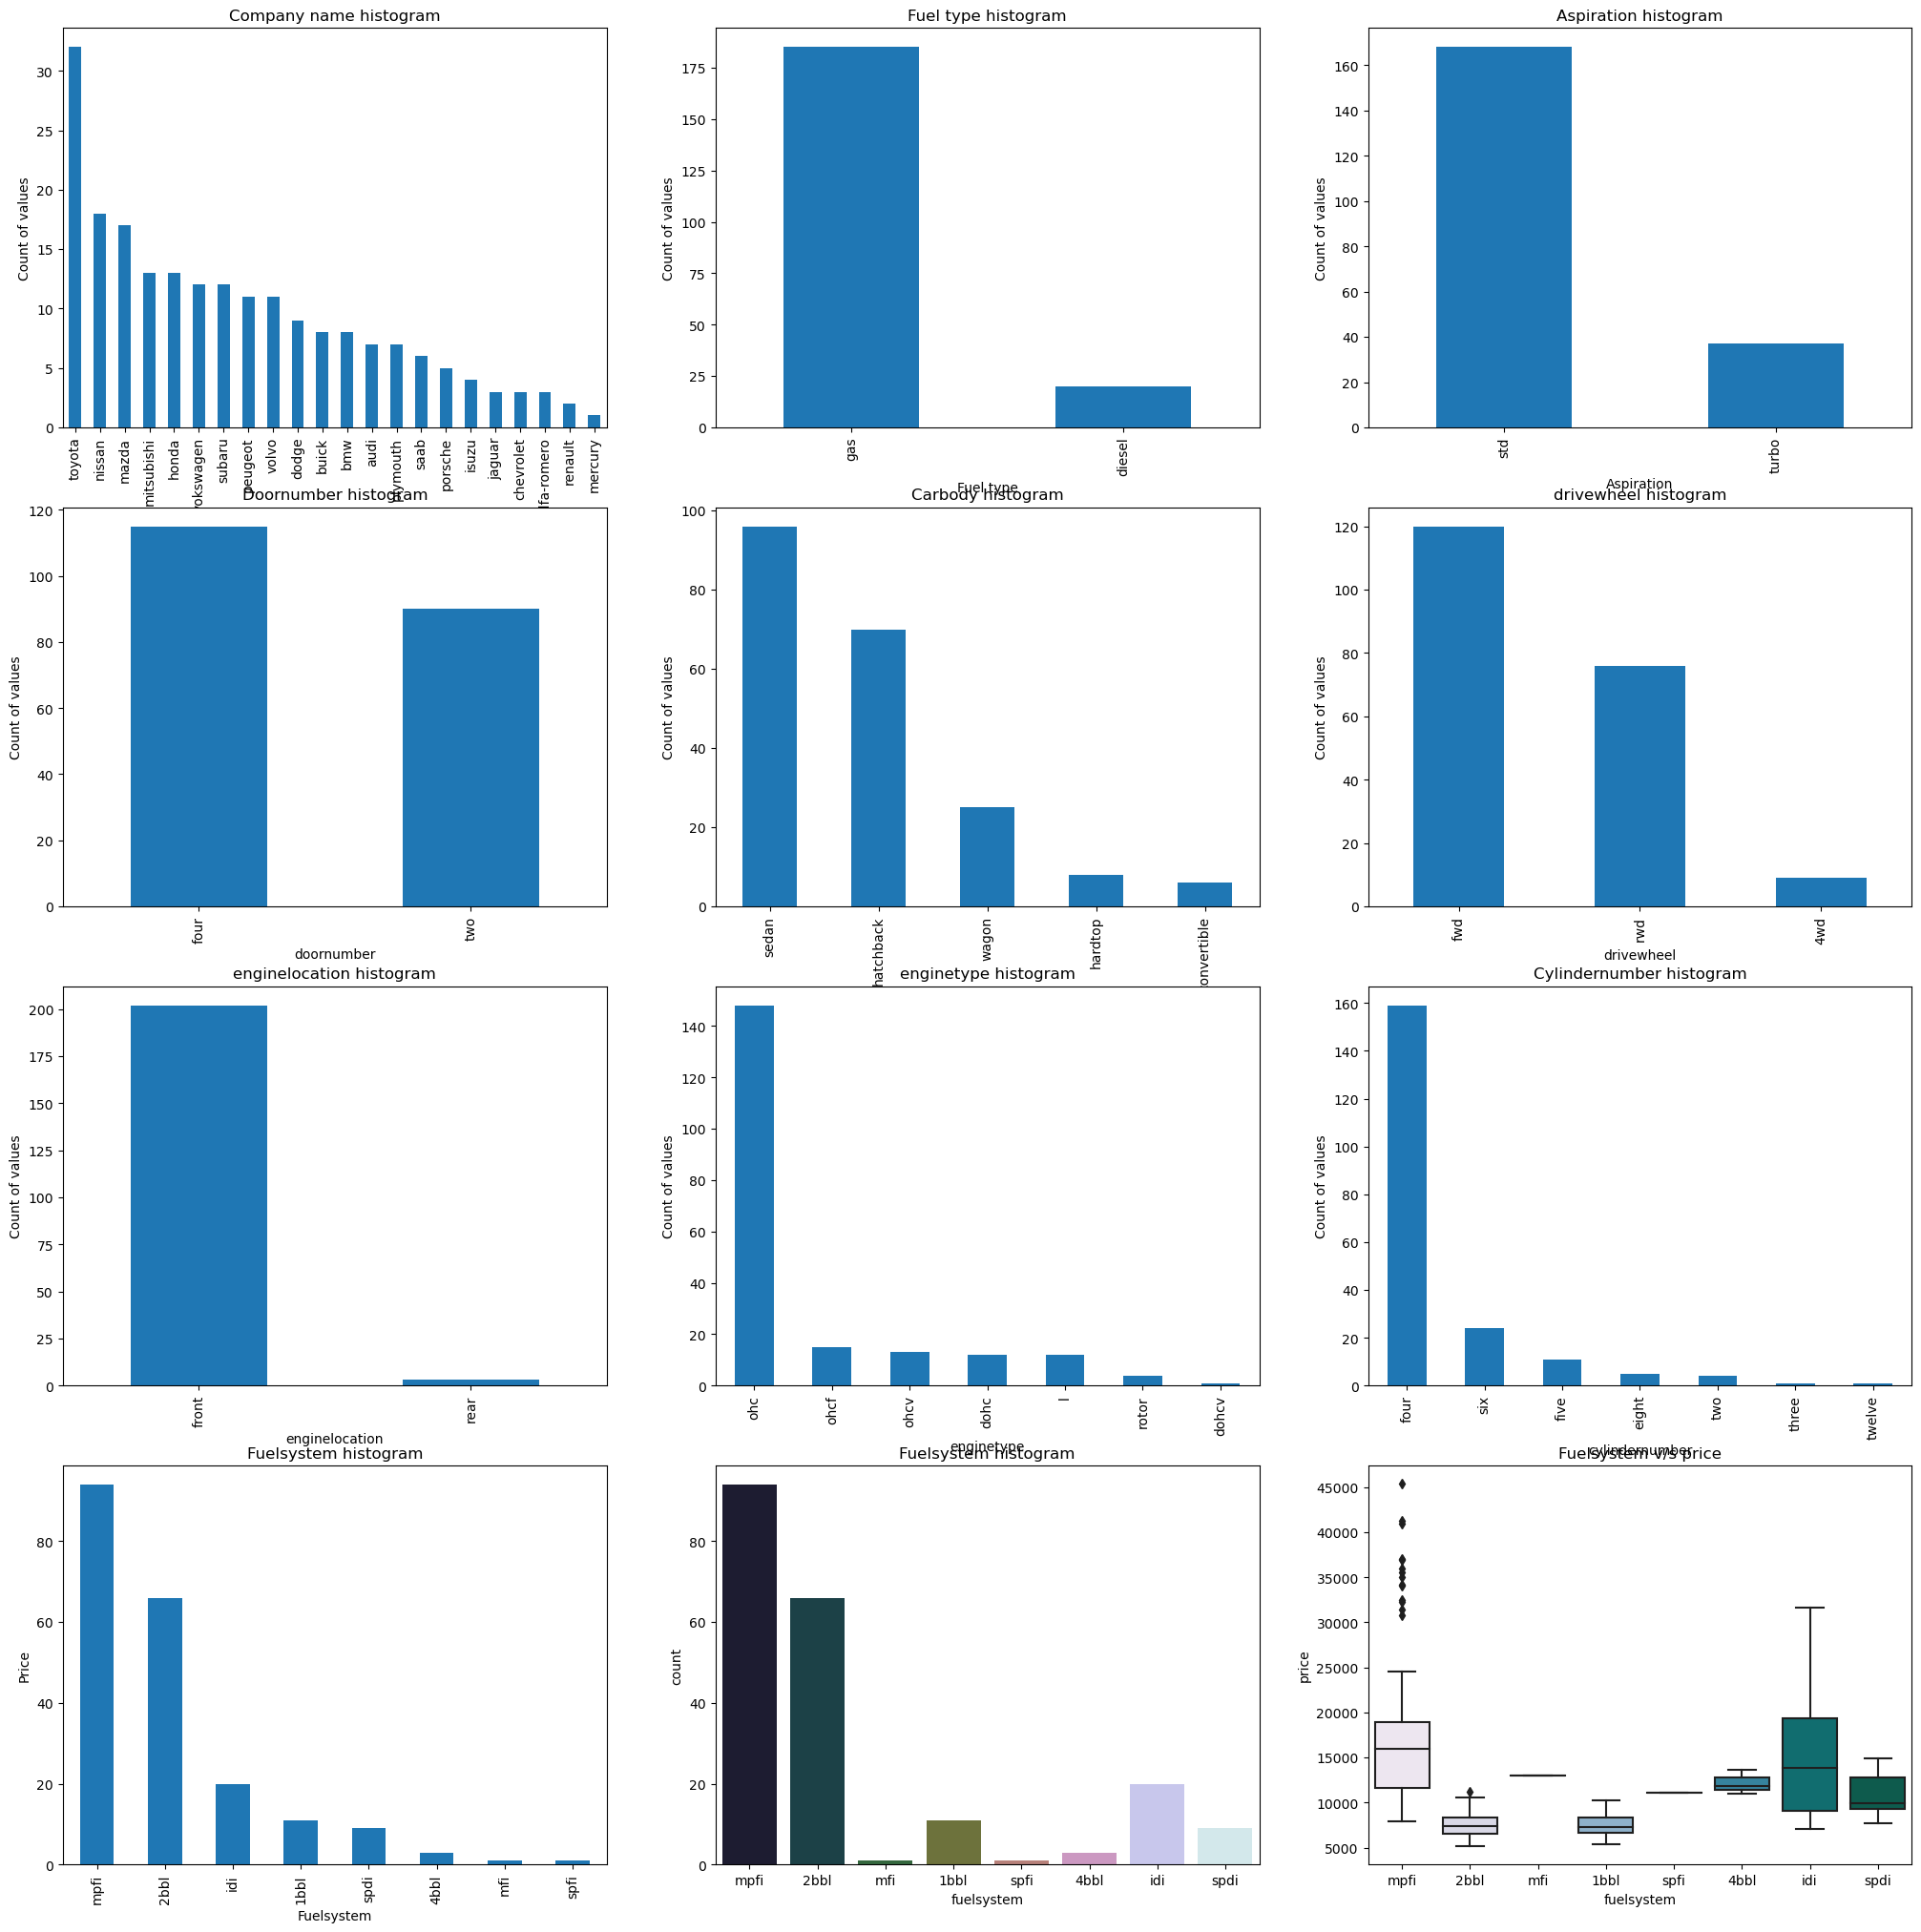

In [22]:

plt.figure(figsize=(25,25))


plt.subplot(4,3,1)
plt1=data.CompanyName.value_counts().plot(kind='bar')
plt.title('Company name histogram')
plt1.set(xlabel='Company', ylabel='Count of values')


plt.subplot(4,3,2)
plt1=data.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel type histogram')
plt1.set(xlabel='Fuel type', ylabel='Count of values')

plt.subplot(4,3,3)
plt1=data.aspiration.value_counts().plot(kind='bar')
plt.title('Aspiration histogram')
plt1.set(xlabel='Aspiration', ylabel='Count of values')

plt.subplot(4,3,4)
plt1=data.doornumber.value_counts().plot(kind='bar')
plt.title('Doornumber histogram')
plt1.set(xlabel='doornumber', ylabel='Count of values')

plt.subplot(4,3,5)
plt1=data.carbody.value_counts().plot(kind='bar')
plt.title('Carbody histogram')
plt1.set(xlabel='Carbody', ylabel='Count of values')

plt.subplot(4,3,6)
plt1=data.drivewheel.value_counts().plot(kind='bar')
plt.title('drivewheel histogram')
plt1.set(xlabel='drivewheel', ylabel='Count of values')

plt.subplot(4,3,7)
plt1=data.enginelocation.value_counts().plot(kind='bar')
plt.title('enginelocation histogram')
plt1.set(xlabel='enginelocation', ylabel='Count of values')

plt.subplot(4,3,8)
plt1=data.enginetype.value_counts().plot(kind='bar')
plt.title('enginetype histogram')
plt1.set(xlabel='enginetype', ylabel='Count of values')

plt.subplot(4,3,9)
plt1=data.cylindernumber.value_counts().plot(kind='bar')
plt.title('Cylindernumber histogram')
plt1.set(xlabel='cylindernumber', ylabel='Count of values')

plt.subplot(4,3,10)
plt1=data.fuelsystem.value_counts().plot(kind='bar')
plt.title('Fuelsystem histogram')
plt1.set(xlabel='Fuelsystem', ylabel='Count of values')

plt.subplot(4,3,11)
sns.countplot(x="fuelsystem", data=data, palette="cubehelix")
plt.title('Fuelsystem histogram')
plt1.set(xlabel='Fuelsystem', ylabel='Count of values')

plt.subplot(4,3,12)
sns.boxplot(x="fuelsystem", y="price",data=data, palette="PuBuGn")
plt.title('Fuelsystem v/s price')
plt1.set(xlabel='Fuelsystem', ylabel='Price')


plt.show()


In [23]:
# plt.figure(figsize=(20,20))

# plt.subplot(1,3,1)
# df1=pd.DataFrame(data.groupby(['CompanyName'])['price'].mean().sort_values(ascending=False))
# df1.plot.bar()
# plt.title("Avg price by company")
# plt.show()

# plt.subplot(1,3,2)
# df2=pd.DataFrame(data.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
# df2.plot.bar()
# plt.title("Avg price by Fuel Type")
# plt.show()

# plt.subplot(1,3,3)
# df3=pd.DataFrame(data.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
# df3.plot.bar()
# plt.title("Avg price by Car body")
# plt.show()

In [24]:
#Creating a function to group values by any categorical variable and look at the max, min, mean, count of numerical variable

def group_by_values(to_group,value):
    result = pd.DataFrame(data.groupby(to_group)[value]
        .agg(
            Min_Price='min',
            Max_Price='max',
            Avg_Price='mean',
            Count_values='count'
        )
        .sort_values(by='Avg_Price', ascending=False).reset_index()
    )
    print(result)

    plt.figure(figsize=(12,6))

    # Plot all three price columns
    plt.plot(result[to_group], result['Min_Price'], marker='o', label='Min Price')
    plt.plot(result[to_group], result['Max_Price'], marker='o', label='Max Price')
    plt.plot(result[to_group], result['Avg_Price'], marker='o', label='Avg Price')

    # Add labels and title
    plt.xlabel(to_group)
    plt.ylabel(value)
    plt.title('Min, Max, and Avg Price')
    plt.xticks(rotation=90)  # rotate company names for readability
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
def price_box_plot(a,b):
    sns.boxplot(x=data[a], y=data[b], palette=("plasma"))

    CompanyName  Min_Price  Max_Price     Avg_Price  Count_values
0        jaguar    32250.0    36000.0  34600.000000             3
1         buick    25552.0    45400.0  33647.000000             8
2       porsche    22018.0    37028.0  31400.500000             5
3           bmw    16430.0    41315.0  26118.750000             8
4         volvo    12940.0    22625.0  18063.181818            11
5          audi    13950.0    23875.0  17859.166714             7
6       mercury    16503.0    16503.0  16503.000000             1
7   alfa-romero    13495.0    16500.0  15498.333333             3
8       peugeot    11900.0    18150.0  15489.090909            11
9          saab    11850.0    18620.0  15223.333333             6
10        mazda     5195.0    18344.0  10652.882353            17
11       nissan     5499.0    19699.0  10415.666667            18
12    vokswagen     7775.0    13845.0  10077.500000            12
13       toyota     5348.0    17669.0   9885.812500            32
14      re

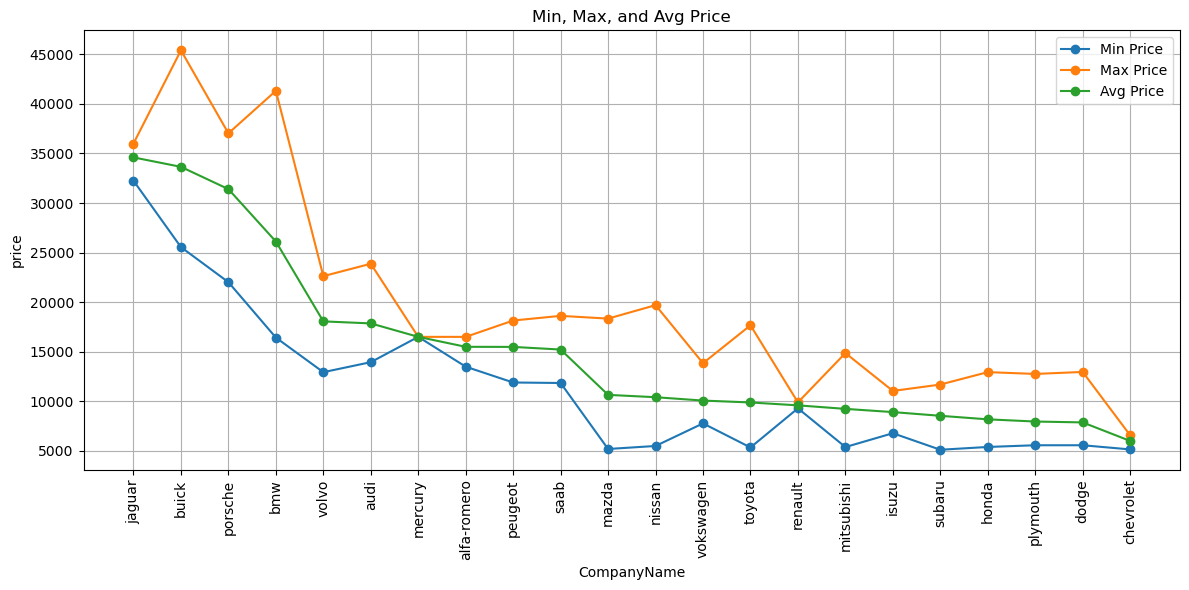

In [25]:
group_by_values('CompanyName','price')

Index(['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


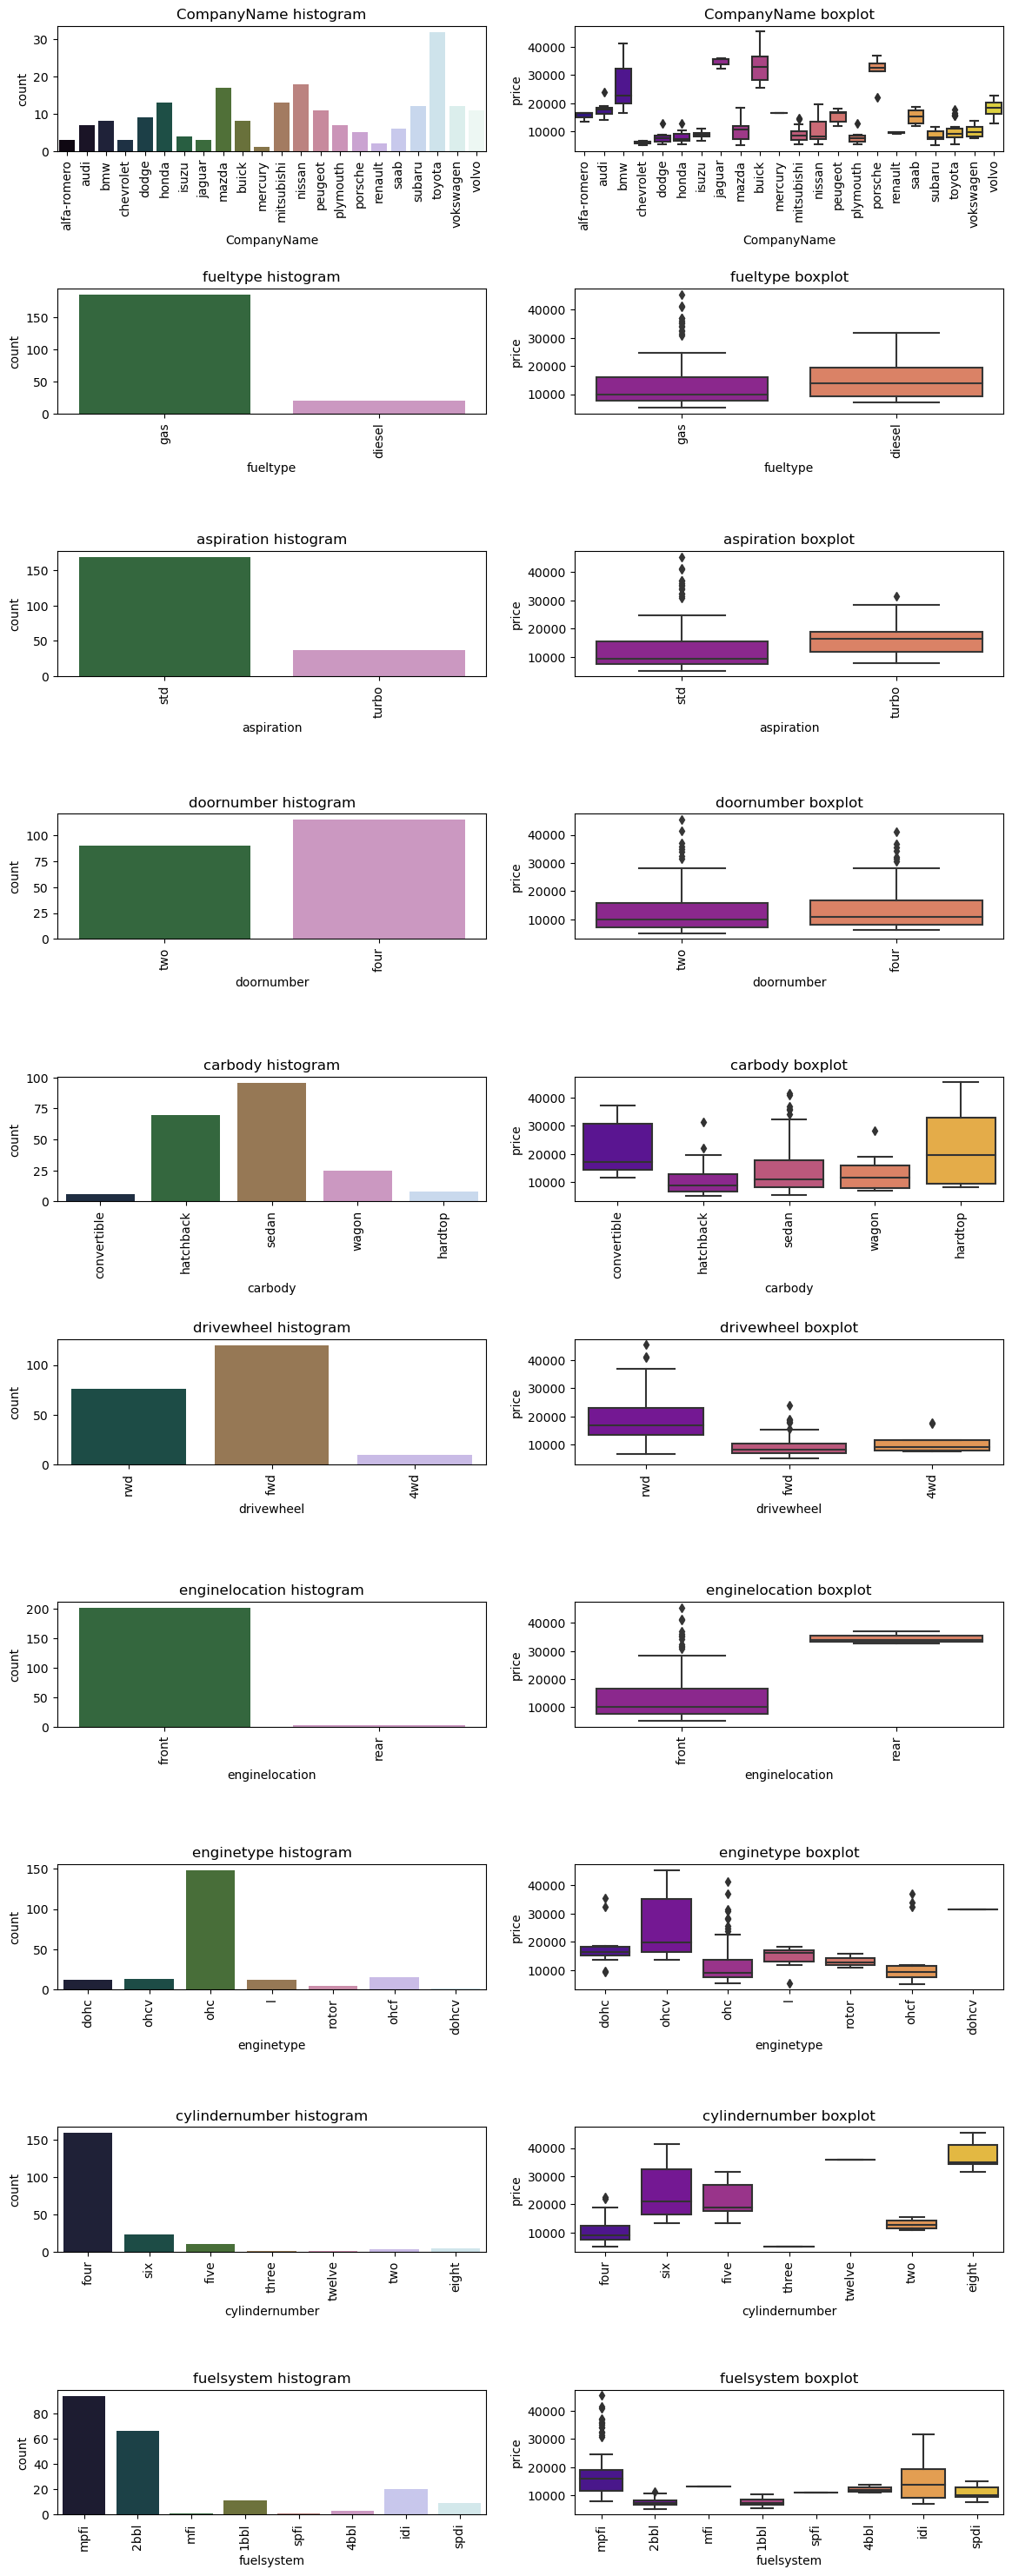

In [26]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
l=len(categorical_cols)
print(categorical_cols)

plt.figure(figsize=(12,30))

#Loop to create subplots of all the categorical variables present in the data

for i in range(l):
    plt.subplot(l,2,(2*i)+1)
    sns.countplot(x=categorical_cols[i], data=data, palette="cubehelix")
    plt.title(categorical_cols[i]+' histogram')
    plt.xticks(rotation=90) 
    
    plt.subplot(l,2,2*i+2)
    sns.boxplot(x=data[categorical_cols[i]], y=data.price, palette=("plasma"))
    plt.title(categorical_cols[i]+' boxplot')
    plt.xticks(rotation=90) 

plt.tight_layout(pad=2.0)
plt.show()

From here, we can see that which all categorical variables are actually affecting the price of the car
<br>Namely,
1. Company Name- high
2. fuel type -medium
3. aspiration- medium
4. doornumber- negligible
5. carbody- medium
6. drivewheel- high
7. enginelocation- high
8. enginetype- high
9. cylinder number- high
10. fuel system- low

### Visualising numerical data

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


/var/folders/g9/qgc41ngn72166dpgb6kt699h0000gn/T/ipykernel_49143/1126871214.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[numeric_cols[i]], y=data.price, palette=("plasma"))
/var/folders/g9/qgc41ngn72166dpgb6kt699h0000gn/T/ipykernel_49143/1126871214.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[numeric_cols[i]], y=data.price, palette=("plasma"))
/var/folders/g9/qgc41ngn72166dpgb6kt699h0000gn/T/ipykernel_49143/1126871214.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[numeric_cols[i]], y=data.price, palette=("plasma"))
/var/folders/g9/qgc41ngn72166dpgb6kt699h0000gn/T/ipykernel_49143/1126871214.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[numeric_cols[i]], y=data.price, palette=("plasma"))
/var/folders/g9/qgc41ngn72166dpgb6kt699h0000gn/T/ipykern

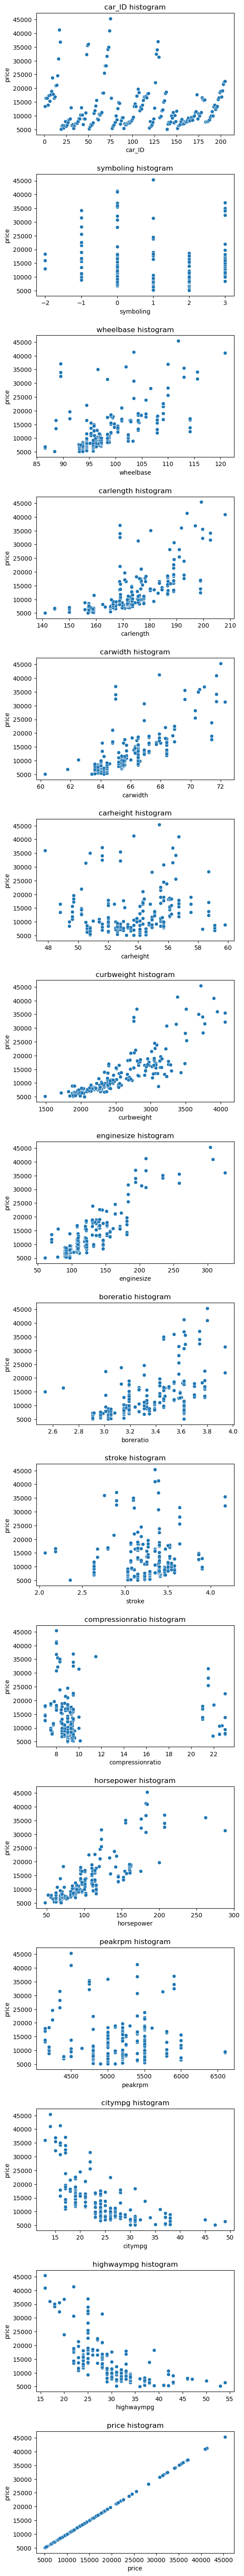

In [27]:
numeric_cols = data.select_dtypes(include=['number']).columns
l2=len(numeric_cols)
print(numeric_cols)

plt.figure(figsize=(6,60))

for i in range(l2):
    plt.subplot(l2,1,i+1)
    sns.scatterplot(x=data[numeric_cols[i]], y=data.price, palette=("plasma"))
    plt.title(numeric_cols[i]+' histogram')
plt.tight_layout(pad=2.0)
plt.show()

In [28]:
#print(categorical_cols)
#print(numeric_cols)

columns_info = pd.DataFrame({
    "Column": data.columns,
    "Dtype": data.dtypes.values
})
print(columns_info)

              Column    Dtype
0             car_ID    int64
1          symboling    int64
2        CompanyName   object
3           fueltype   object
4         aspiration   object
5         doornumber   object
6            carbody   object
7         drivewheel   object
8     enginelocation   object
9          wheelbase  float64
10         carlength  float64
11          carwidth  float64
12         carheight  float64
13        curbweight    int64
14        enginetype   object
15    cylindernumber   object
16        enginesize    int64
17        fuelsystem   object
18         boreratio  float64
19            stroke  float64
20  compressionratio  float64
21        horsepower    int64
22           peakrpm    int64
23           citympg    int64
24        highwaympg    int64
25             price  float64


From here, we can see that which all numerical variables are actually affecting the price of the car
<br>Namely,
1. car_id- negligible( as expected)
2. symboling- is categorical variable
3. wheelbase- medium
4. carlength- high
5. carwidth- high
6. carhight- negligible
7. curbweight- high
8. enginesize- high
9. boreratio- medium
10. stroke- negligible
11. compression-ratio - cannot say from the graph
12. horsepower- high
13. peak rpm- categorical variable
14. citympg- medium
15. highwaympg- medium

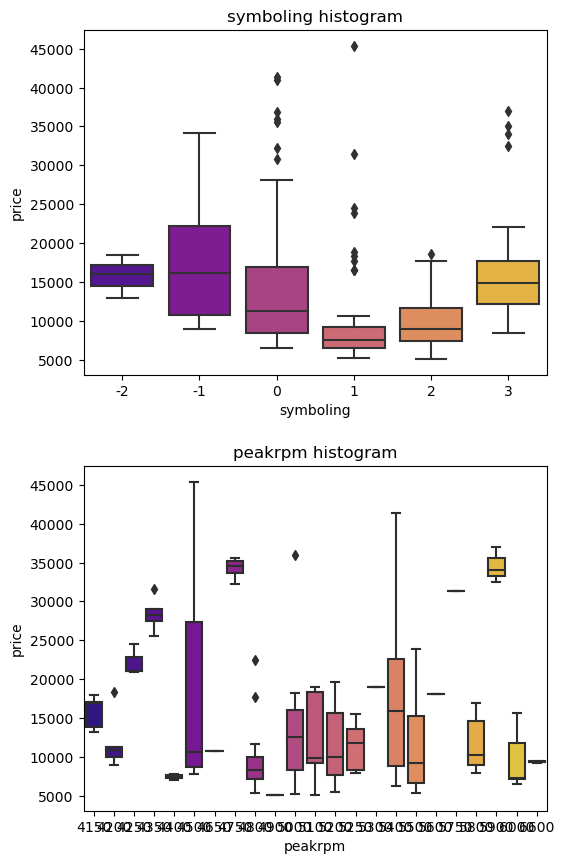

In [29]:
new_categorical_cols=['symboling','peakrpm']
l=len(new_categorical_cols)

plt.figure(figsize=(6,9))

for i in range(l):
    plt.subplot(l,1,i+1)
    sns.boxplot(x=data[new_categorical_cols[i]], y=data.price, palette=("plasma"))
    plt.title(new_categorical_cols[i]+' histogram')

plt.tight_layout(pad=2.0)
plt.show()

1. Symboling- medium
2. peakrpm- low

Significant variable from visual graph
1. Company Name
1. carbody
1. drivewheel
1. enginelocation
1. enginetype
1. cylinder number
1. wheelbase
1. carlength
1. carwidth
1. curbweight
1. enginesize
1. boreratio
1. compressionratio
1. horsepower
1. citympg
1. highwaympg
1. Symboling
1. Aspiration
1. Fuel type

In [30]:
cars_list=['CompanyName','carbody','drivewheel','enginelocation','enginetype',
'cylindernumber','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','compressionratio',
'horsepower','citympg','highwaympg','symboling','aspiration','fueltype','price']
cars=data[cars_list]

In [31]:
cars.head

<bound method NDFrame.head of      CompanyName      carbody drivewheel enginelocation enginetype  \
0    alfa-romero  convertible        rwd          front       dohc   
1    alfa-romero  convertible        rwd          front       dohc   
2    alfa-romero    hatchback        rwd          front       ohcv   
3           audi        sedan        fwd          front        ohc   
4           audi        sedan        4wd          front        ohc   
..           ...          ...        ...            ...        ...   
200        volvo        sedan        rwd          front        ohc   
201        volvo        sedan        rwd          front        ohc   
202        volvo        sedan        rwd          front       ohcv   
203        volvo        sedan        rwd          front        ohc   
204        volvo        sedan        rwd          front        ohc   

    cylindernumber  wheelbase  carlength  carwidth  curbweight  enginesize  \
0             four       88.6      168.8      64.1 

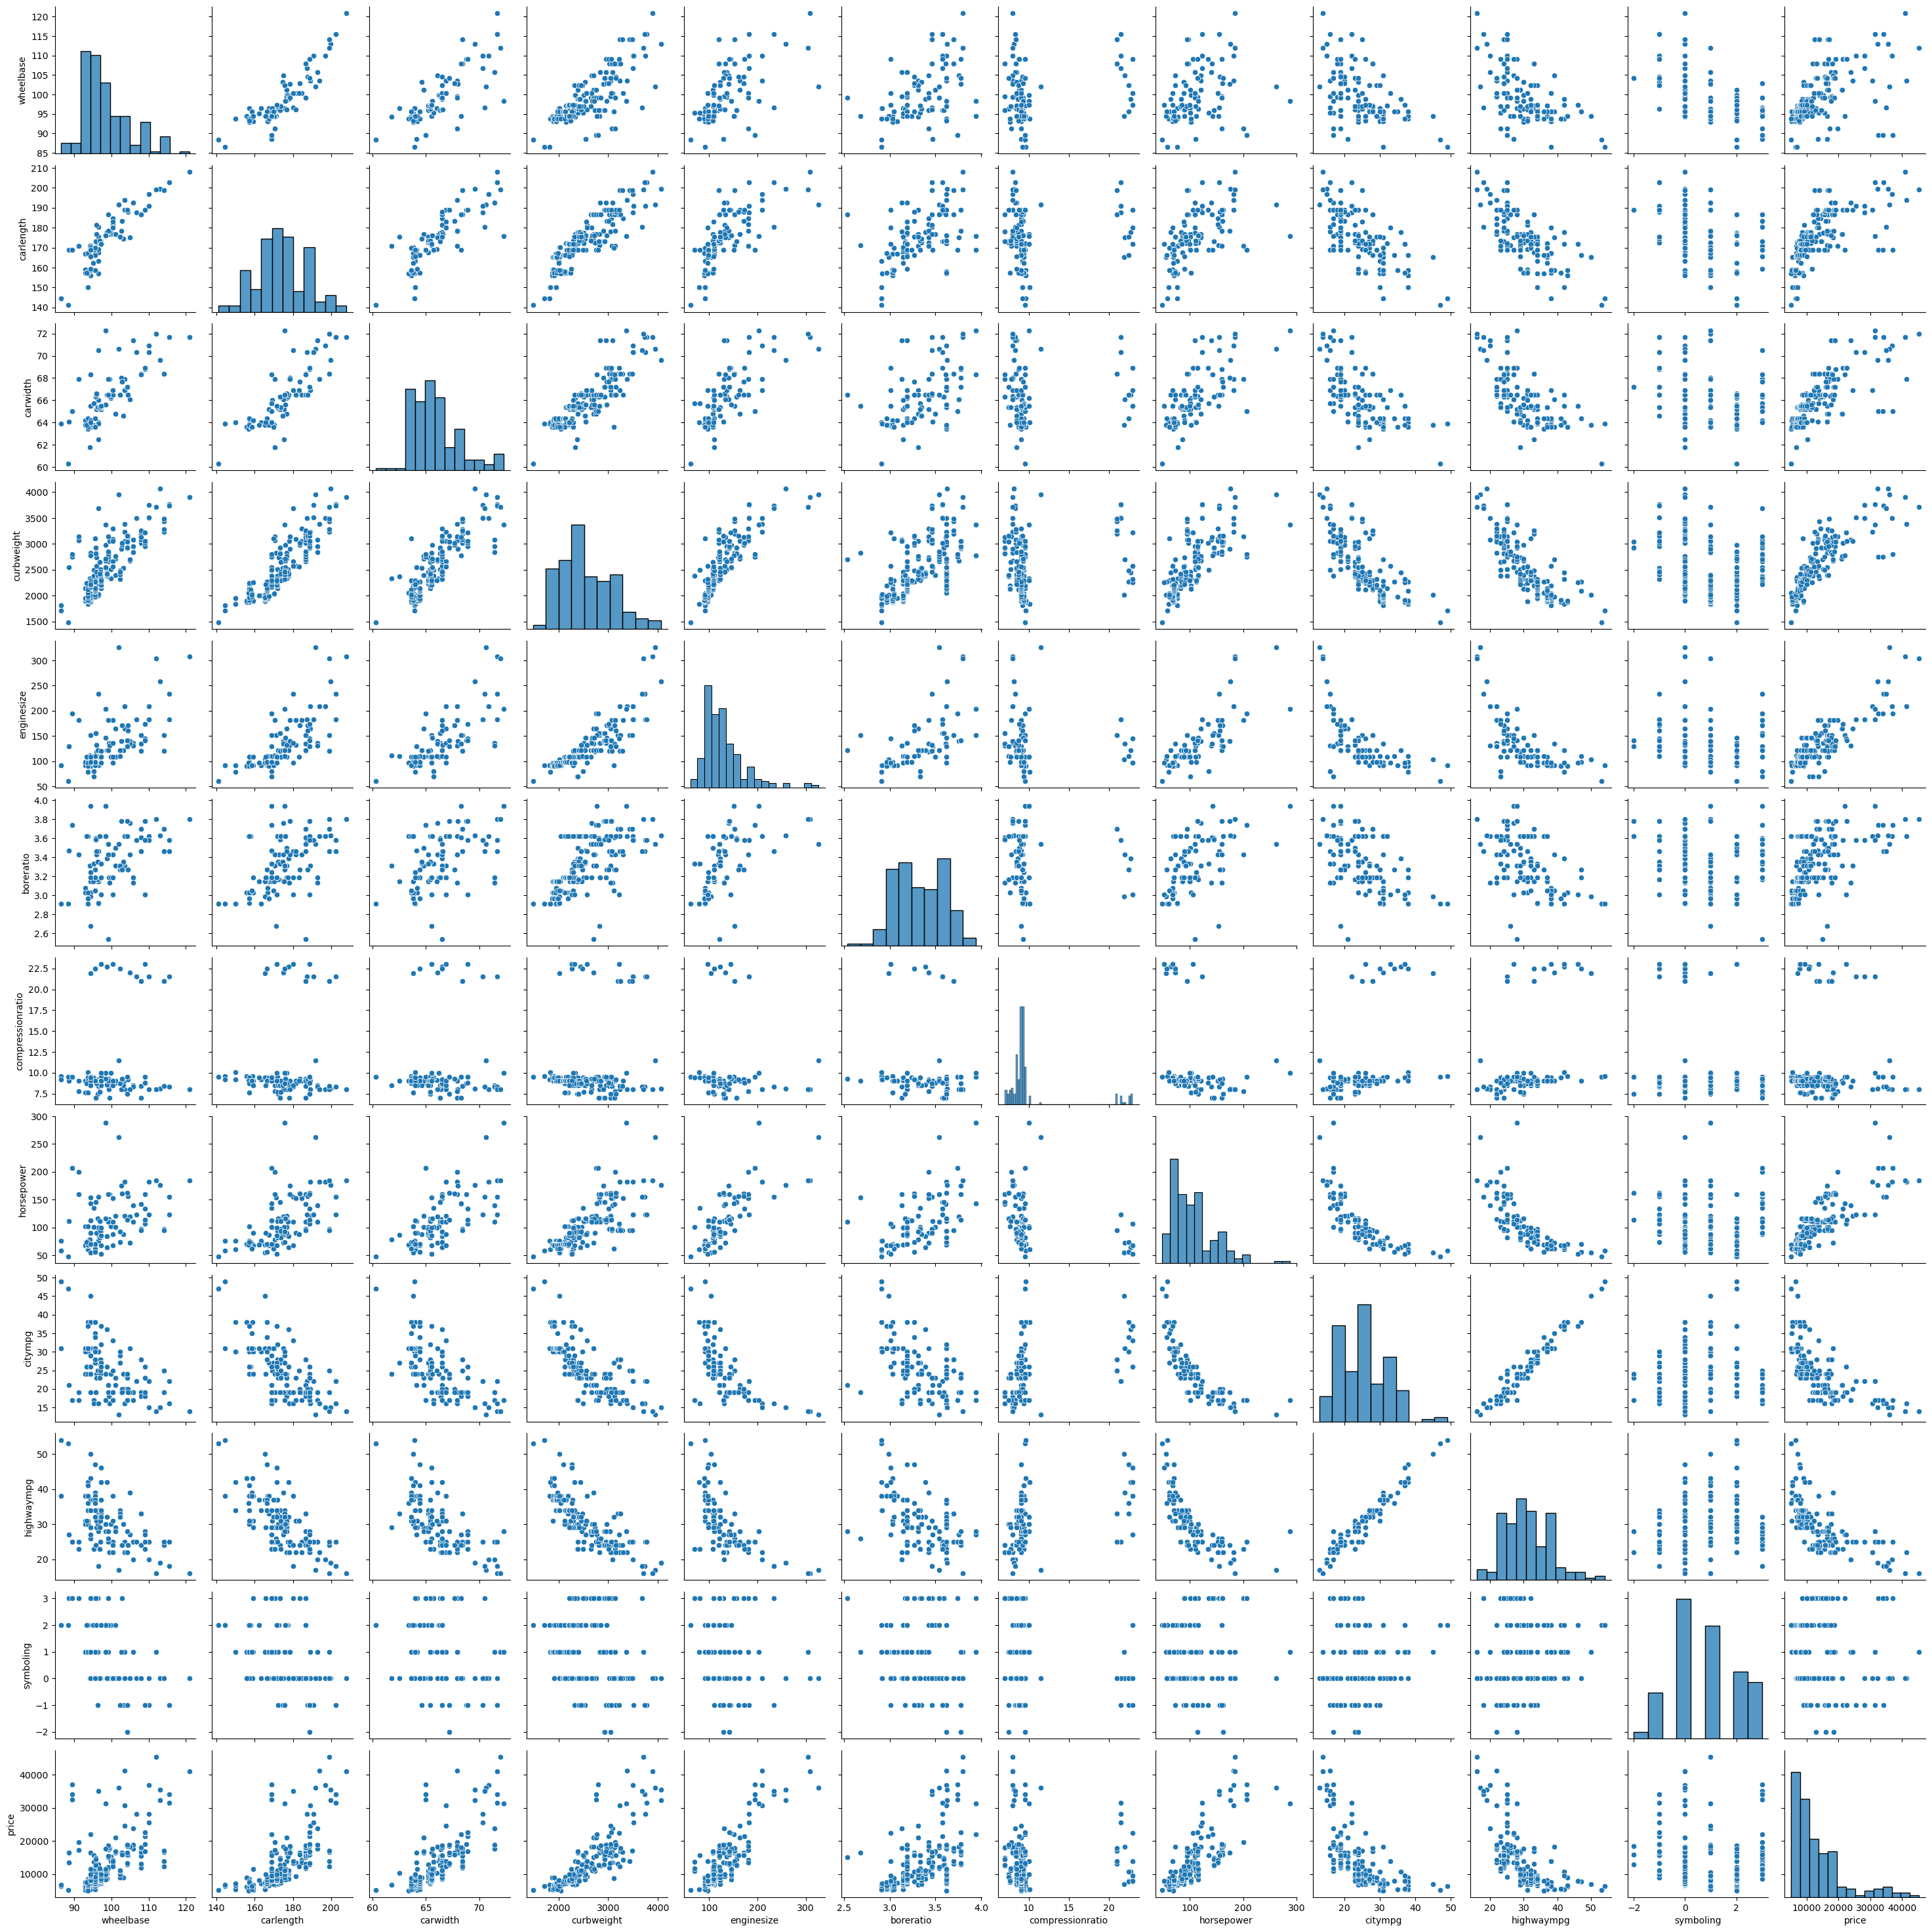

In [32]:
sns.pairplot(cars)
plt.show()

### Dummy variables

In [33]:
cars.shape

(205, 20)

In [34]:
numerical=cars.select_dtypes(include=['number']).columns
numerical = numerical.drop('symboling')
print(numerical)

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'compressionratio', 'horsepower', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [35]:
categorical=cars.select_dtypes(include=['object', 'category']).columns
#categorical=cars.select_dtypes(include=['object', 'category']).columns
categorical = categorical.append(pd.Index(['symboling']))
print(categorical)

Index(['CompanyName', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'aspiration', 'fueltype', 'symboling'],
      dtype='object')


In [36]:
l= len(categorical)

for i in range(l):
    temp=pd.get_dummies(cars[categorical[i]],drop_first=True,prefix=categorical[i],prefix_sep='_',)
    cars=pd.concat([cars,temp],axis=1)
    cars.drop(categorical[i],axis=1,inplace=True)

In [37]:
cars.head()

wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \
0       88.6      168.8      64.1        2548         130       3.47   
1       88.6      168.8      64.1        2548         130       3.47   
2       94.5      171.2      65.5        2823         152       2.68   
3       99.8      176.6      66.2        2337         109       3.19   
4       99.4      176.6      66.4        2824         136       3.19   

   compressionratio  horsepower  citympg  highwaympg  ...  \
0               9.0         111       21          27  ...   
1               9.0         111       21          27  ...   
2               9.0         154       19          26  ...   
3              10.0         102       24          30  ...   
4               8.0         115       18          22  ...   

   cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
0                     0                      0                   0   
1                     0                      0                   0   
2                     0                      0                   0   
3                     0                      0                   0   
4                     0                      0                   0   

   aspiration_turbo  fueltype_gas  symboling_-1  symboling_0  symboling_1  \
0                 0             1             0            0            0   
1                 0             1             0            0            0   
2                 0             1             0            0            1   
3                 0             1             0            0            0   
4                 0             1             0            0            0   

   symboling_2  symboling_3  
0            0            1  
1            0            1  
2            0            0  
3            1            0  
4            1            0  

[5 rows x 58 columns]

In [38]:
cars.shape

(205, 58)

### Training

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# making the random generation of values constant
np.random.seed(0)

In [41]:
df_train,df_test=train_test_split(cars,train_size=0.7,test_size=0.3,random_state=100)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_train[numerical]=scaler.fit_transform(df_train[numerical])

In [43]:

df_train.head()

wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \
122   0.244828   0.426016  0.291667    0.272692    0.139623   0.230159   
125   0.272414   0.452033  0.666667    0.500388    0.339623   1.000000   
166   0.272414   0.448780  0.308333    0.314973    0.139623   0.444444   
1     0.068966   0.450407  0.316667    0.411171    0.260377   0.626984   
199   0.610345   0.775610  0.575000    0.647401    0.260377   0.746032   

     compressionratio  horsepower   citympg  highwaympg  ...  \
122           0.15000    0.083333  0.500000    0.567568  ...   
125           0.15625    0.395833  0.166667    0.270270  ...   
166           0.15000    0.266667  0.361111    0.324324  ...   
1             0.12500    0.262500  0.222222    0.270270  ...   
199           0.03125    0.475000  0.111111    0.135135  ...   

     cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
122                     0                      0                   0   
125                     0                      0                   0   
166                     0                      0                   0   
1                       0                      0                   0   
199                     0                      0                   0   

     aspiration_turbo  fueltype_gas  symboling_-1  symboling_0  symboling_1  \
122                 0             1             0            0            1   
125                 0             1             0            0            0   
166                 0             1             0            0            1   
1                   0             1             0            0            0   
199                 1             1             1            0            0   

     symboling_2  symboling_3  
122            0            0  
125            0            1  
166            0            0  
1              0            1  
199            0            0  

[5 rows x 58 columns]

In [44]:
df_train.describe()

wheelbase   carlength    carwidth  curbweight  enginesize   boreratio  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.411141    0.525476    0.461655    0.407878    0.241351    0.497946   
std      0.205581    0.204848    0.184517    0.211269    0.154619    0.207140   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.272414    0.399187    0.304167    0.245539    0.135849    0.305556   
50%      0.341379    0.502439    0.425000    0.355702    0.184906    0.500000   
75%      0.503448    0.669919    0.550000    0.559542    0.301887    0.682540   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       compressionratio  horsepower     citympg  highwaympg  ...  \
count        143.000000  143.000000  143.000000  143.000000  ...   
mean           0.190787    0.227302    0.344211    0.374976  ...   
std            0.237181    0.165511    0.186165    0.188477  ...   
min            0.000000    0.000000    0.000000    0.000000  ...   
25%            0.100000    0.091667    0.166667    0.216216  ...   
50%            0.125000    0.191667    0.333333    0.378378  ...   
75%            0.150000    0.283333    0.500000    0.527027  ...   
max            1.000000    1.000000    1.000000    1.000000  ...   

       cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
count            143.000000             143.000000          143.000000   
mean               0.006993               0.006993            0.027972   
std                0.083624               0.083624            0.165472   
min                0.000000               0.000000            0.000000   
25%                0.000000               0.000000            0.000000   
50%                0.000000               0.000000            0.000000   
75%                0.000000               0.000000            0.000000   
max                1.000000               1.000000            1.000000   

       aspiration_turbo  fueltype_gas  symboling_-1  symboling_0  symboling_1  \
count        143.000000    143.000000    143.000000   143.000000   143.000000   
mean           0.181818      0.909091      0.090909     0.349650     0.300699   
std            0.387050      0.288490      0.288490     0.478536     0.460174   
min            0.000000      0.000000      0.000000     0.000000     0.000000   
25%            0.000000      1.000000      0.000000     0.000000     0.000000   
50%            0.000000      1.000000      0.000000     0.000000     0.000000   
75%            0.000000      1.000000      0.000000     1.000000     1.000000   
max            1.000000      1.000000      1.000000     1.000000     1.000000   

       symboling_2  symboling_3  
count   143.000000   143.000000  
mean      0.118881     0.125874  
std       0.324786     0.332873  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000  

[8 rows x 58 columns]

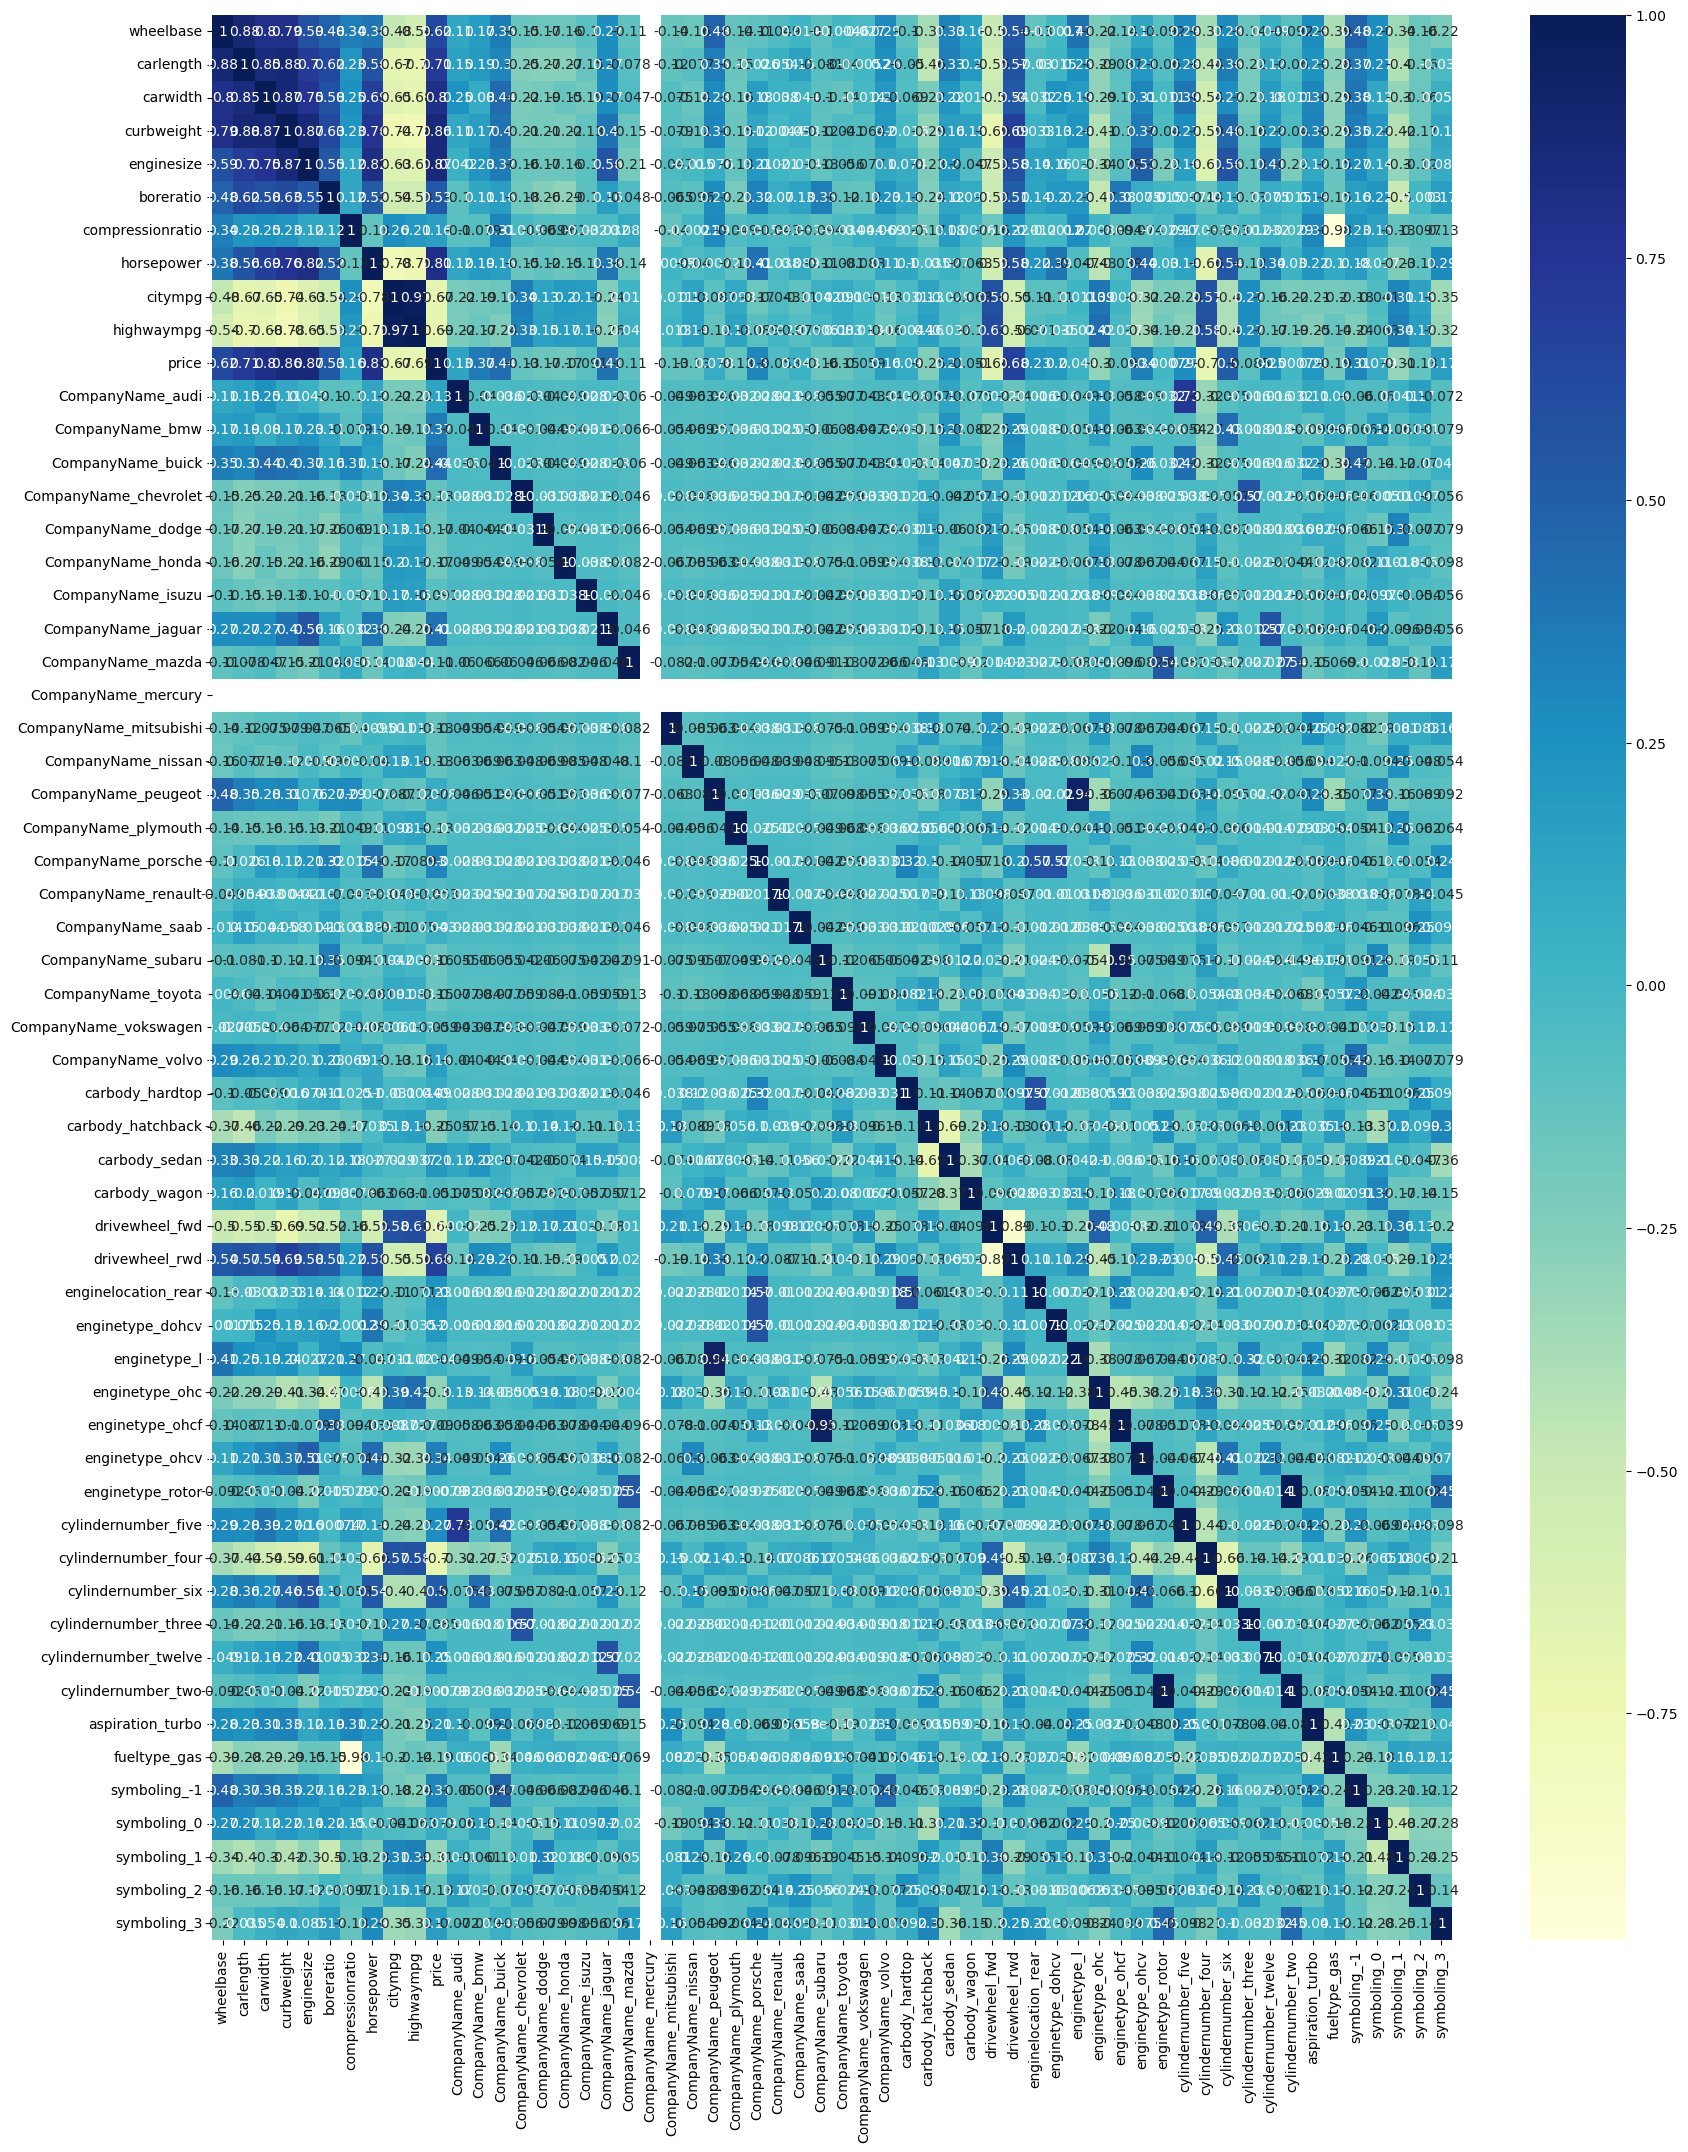

In [45]:
plt.figure(figsize=(20,25))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [46]:
y_train=df_train.pop('price')
x_train=df_train

### Model Builing

In [47]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

For selecting only a few number of features from the list

In [48]:
#lr=LinearRegression()
#lr.fit(x_train,y_train)
#rfe=RFE(estimator=lr, n_features_to_select=17)
#rfe=rfe.fit(x_train,y_train)

In [49]:
#list(zip(x_train.columns,rfe.support_,rfe.ranking_))

In [50]:
#x_train_rfe_df will contain only the said count of features

#x_train_rfe =x_train.columns[rfe.support_]
#x_train_rfe_df = x_train[x_train_rfe]
#x_train_rfe_df.head()

### Building Model

In [51]:
# Model for fitting OLS into x and y
# this will subsequently help us to check the p-value for the features and eliminate the ones that are not significant
def build_model(x,y):
    x=sm.add_constant(x)
    lm=sm.OLS(y,x).fit()
    print(lm.summary())
    p_values = lm.pvalues
    result = pd.DataFrame({
    "Column": p_values.index,
    "p-value": [f"{val:.6f}" for val in p_values.values],
    "Significant": ["Yes" if val <= 0.05 else "No" for val in p_values.values]
    })
    print(result)
    return x,result


# this will help us check multi-collinearity among the variables and help eliminate the feaures that have high VIF values
def check_vif(x):
    vif=pd.DataFrame()
    vif['Features']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF', ascending=False)
    return(vif)

#### Model 1:

In [52]:
lr=LinearRegression()
lr.fit(x_train,y_train)
rfe=RFE(estimator=lr, n_features_to_select=10)
rfe=rfe.fit(x_train,y_train)
x_train_rfe =x_train.columns[rfe.support_]
x_train_rfe_df_1 = x_train[x_train_rfe]

In [53]:
model_1=build_model(x_train_rfe_df_1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     139.3
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           4.75e-65
Time:                        01:56:31   Log-Likelihood:                 191.89
No. Observations:                 143   AIC:                            -361.8
Df Residuals:                     132   BIC:                            -329.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1509    

From this , we should be dropping symboling_1,symboling_3 as P>|t| is greater than 0.05 and hence not statistically significant with 95% significance level


check_vif(x_train) is used in a similiar manner to eliminate the x-values where the vif>=10

#### Model 2

In [54]:
#x_train_2=x_train_rfe_df.drop(['symboling_1','symboling_1'],axis=1)

In [55]:
#model_2=build_model(x_train_2,y_train)

Removing CompanyName_porsche


In [56]:
#x_train_3=x_train_2.drop(['CompanyName_porsche'],axis=1)

In [57]:
#model_3=build_model(x_train_3,y_train)

In [58]:
#check_vif(x_train_3)

## Trying with loop

Instead of running the process manually for each iteration, we can create a loop for the same

In [59]:
from scipy.stats import skew, kurtosis, jarque_bera

In [60]:
def build_model_loop(X, y, threshold=0.05):
    """
    Iteratively builds an OLS model, removing insignificant variables (p > threshold).
    Returns final model and dataframe with coefficients + p-values + significance flag.
    """
    x_new = X.copy()
    while True:
        X = sm.add_constant(X)  # add intercept
        model = sm.OLS(y, X).fit()
        y_pred=model.predict(X)
        # extract p-values
        pvalues = model.pvalues.drop("const", errors="ignore")  # ignore constant term
        result = pd.DataFrame({
            "Feature": pvalues.index,
            "p-value": pvalues.values,
            "Significant": ["Yes" if p <= threshold else "No" for p in pvalues.values]
        })

        # check if any "No" exists
        if "No" not in result["Significant"].values:
            #print(result)
            return x_new,y_pred  # all significant → stop

        # drop the worst insignificant variable (highest p-value)
        worst_feature = result.loc[result["Significant"] == "No"].sort_values("p-value", ascending=False).iloc[0]["Feature"]
        #print(f"Dropping insignificant feature: {worst_feature}")
        X = X.drop(columns=[worst_feature])

        # drop constant before next loop, it will be re-added
        X = X.drop(columns=["const"], errors="ignore")
        x_new = x_new.drop(columns=[worst_feature])
        

# Calculating Variance Inflation Factor of each feature over others and making sure that it is definite(R2!=1)
def vif_calc(x):
    #calculating r2 and dropping cols where r2=1
    r2_scores=pd.DataFrame()
    r2_scores['Features']=x.columns
    r2_scores['Scores'] = [LinearRegression().fit(x.drop(columns=[col]),
    x[col]).score(x.drop(columns=[col]), x[col])
    for col in x.columns]
    r2_scores=r2_scores[r2_scores['Scores']!=1]
    x=x[r2_scores['Features']]
    #calculating VIF
    vif=pd.DataFrame()
    vif['Features']=x.columns
    constant_cols = [col for col in x.columns if x[col].nunique() == 1] # drop any constant columns
    x = x.drop(columns=constant_cols, errors="ignore")
    vif["VIF"] = [variance_inflation_factor(x.values, i)
                  if x.shape[1] > 1 else np.nan  # avoid single column crash 
                  for i in range(x.shape[1])]
    vif["VIF"].replace([np.inf, -np.inf], np.nan, inplace=True)
    vif.dropna(inplace=True)
    vif = vif[vif["VIF"] < 100000]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF', ascending=False)
    return(vif)

# using the function vif_calc to calculate VIF and then iteratively drooping where VIF>10
def vif_loop(x_new):
    while True:
        vif = vif_calc(x_new)
        max_vif = vif["VIF"].max()
        if max_vif > 10:
            drop_feat = vif.sort_values("VIF", ascending=False).iloc[0]["Features"]
            #print(f"Dropping '{drop_feat}' with VIF={max_vif:.2f}")
            x_new = x_new.drop(columns=[drop_feat])
        else:
            break
    return x_new

In [61]:
"""
Function where first Recursive feature elimination method is used to get n features in x_train
Then, a loop is run to iteratively eliminate colums where p-values of each feature<0.05 and vif<10
Till both the conditions are satisfied

Finally Skewness and Kurtosis of error are calculated for that particular number of features
"""

def modelling(x_train,y_train,num_features):
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    rfe=RFE(estimator=lr, n_features_to_select=num_features)
    rfe=rfe.fit(x_train,y_train)
    x_train_rfe =x_train.columns[rfe.support_]
    x_train_rfe_df = x_train[x_train_rfe]
    #x_train_rfe_df.head()
    while True:
        x_new,y_pred=build_model_loop(x_train_rfe_df,y_train)
        x_new=vif_loop(x_new)
        x_temp,y_pred=build_model_loop(x_new,y_train)
        if x_temp.columns.all()==x_new.columns.all():
            #check_vif(x_new)
            e=y_train-y_pred
            skewness = skew(e)
            kurt = kurtosis(e, fisher=False)
            jb_stat, jb_pvalue = jarque_bera(e)
            return x_new,y_pred,skewness,kurt,jb_stat, jb_pvalue
        else:
            x_train_rfe_df=x_new
    

In [62]:
#This loop is used to select the optimum no. of features for which the skewness and kurosis 
#is nearest to that of a normal distribution as that is a condition for linearity

df = pd.DataFrame(columns=["Features", "Skewness", "Kurtosis"])
results = []
for j in range(x_train.shape[1]-1):
    x_new,y_pred,skewness,kurt,jb_stat, jb_pvalue=modelling(x_train,y_train,j+4)
    #print("feature= "+str(j+4)+"skewness= "+str(skewness)+ " and kurtosis= "+str(kurt)+" and jb_stat="+str(jb_stat)+" and jb_pvalue="+str(jb_pvalue))
    results.append({
        "Feature": j+4,
        "Skewness": skewness,
        "Kurtosis": kurt,
        "JB_Stat": jb_stat,
        "JB_pvalue": jb_pvalue
    })
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="JB_pvalue", ascending=False).reset_index(drop=True)

print(results_df)

    

    Feature  Skewness  Kurtosis     JB_Stat     JB_pvalue
0         5  0.576137  3.410420    8.914732  1.159286e-02
1        31  0.471787  4.377396   16.609177  2.473791e-04
2        30  0.471787  4.377396   16.609177  2.473791e-04
3        27  0.473233  4.631687   21.200939  2.490431e-05
4        28  0.473233  4.631687   21.200939  2.490431e-05
5        14  0.841898  4.307374   27.077016  1.319170e-06
6        35  0.783970  4.705836   31.986200  1.133144e-07
7        34  0.783970  4.705836   31.986200  1.133144e-07
8        33  0.783970  4.705836   31.986200  1.133144e-07
9        23  0.723248  4.896669   33.901154  4.349686e-08
10       24  0.723248  4.896669   33.901154  4.349686e-08
11       22  0.833632  5.239085   46.434909  8.256340e-11
12       21  0.833632  5.239085   46.434909  8.256340e-11
13       25  0.833632  5.239085   46.434909  8.256340e-11
14        6  1.076998  4.858850   48.232852  3.360232e-11
15       29  1.043467  5.075753   51.623277  6.168050e-12
16       26  0

#### From here taking feature=5 
At 99% significance

In [63]:
x_new,y_pred,skewness,kurt,jb_stat,jb_pvalue=modelling(x_train,y_train,5)

In [64]:
x_new.columns

Index(['carwidth', 'enginesize', 'CompanyName_bmw', 'enginelocation_rear'], dtype='object')

In [65]:
print(skewness,kurt)
print(x_new.columns)

0.5761368056858854 3.4104196270920877
Index(['carwidth', 'enginesize', 'CompanyName_bmw', 'enginelocation_rear'], dtype='object')


### Prediction and Evaluation of the model

In [66]:
scaler=MinMaxScaler()
df_test[numerical]=scaler.fit_transform(df_test[numerical])

In [67]:
y_test=df_test.pop('price')
x_test=df_test

In [68]:
x_new = sm.add_constant(x_new)
lm=sm.OLS(y_train,x_new).fit()

In [69]:
x_new = x_new.drop("const", axis=1)
x_test=x_test[x_new.columns]
x_test=sm.add_constant(x_test)

In [70]:
print(x_new.columns)
print(x_test.columns)

Index(['carwidth', 'enginesize', 'CompanyName_bmw', 'enginelocation_rear'], dtype='object')
Index(['const', 'carwidth', 'enginesize', 'CompanyName_bmw',
       'enginelocation_rear'],
      dtype='object')


In [71]:
y_test_pred=lm.predict(x_test)

In [72]:
print(x_new.columns)
print(x_test.columns)

Index(['carwidth', 'enginesize', 'CompanyName_bmw', 'enginelocation_rear'], dtype='object')
Index(['const', 'carwidth', 'enginesize', 'CompanyName_bmw',
       'enginelocation_rear'],
      dtype='object')


In [73]:
x_test.shape


(62, 5)

Evaluation of test via comparison of y_pred and y_test

In [74]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_test_pred)

0.8376771108328542

Text(0, 0.5, 'y_test_pred')

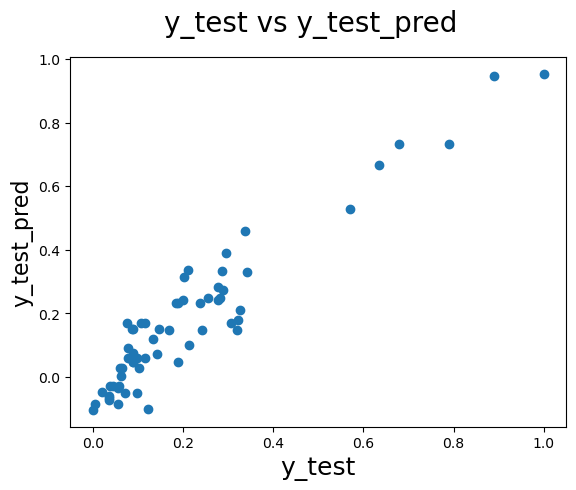

In [75]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16) 


In [76]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     245.3
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           1.18e-61
Time:                        01:56:54   Log-Likelihood:                 166.60
No. Observations:                 143   AIC:                            -323.2
Df Residuals:                     138   BIC:                            -308.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1868    

## Summary
1. R- squared and adjusted r-square values denote that 88% of the variance is explained by the model
1. F-statistic P<0.05, which means that model fit is significant
1. P-value of each variable<0.05 
1. Prob(JB)>0.01 which shows that the errors are normally distributed at 99% significance